## OOIPY Demo

This notebook is written by <a href="https://sites.google.com/a/uw.edu/abadi/">Shima Abadi</a> in June 2022.
In this notebook, I show how to use <a href="https://ooipy.readthedocs.io/en/latest/index.html">OOIPY</a>  to read, plot, and process OOI hydrophone data. 

In [29]:
import ooipy
import matplotlib.pyplot as plt
import datetime

# **Download Low-frequency (Fs=200 Hz) Data from OOI**

You ned to choose a note from this list:

For low-frequency hydrophones (Fs = 200 Hz):
- 'Axial_Base'
- 'Central_Caldera'
- 'Eastern_Caldera'  
- 'Southern_Hydrate'
- 'Slope_Base'

You also need to have a starttime and endtime in this format (yy,m,d,hh,min,sec)

In [2]:
starttime = datetime.datetime(2019,2,3,13,0,0)
endtime = datetime.datetime(2019,2,3,13,15,0)
node = 'Axial_Base'
data_trace = ooipy.get_acoustic_data_LF(starttime, endtime, node, verbose=True, zero_mean=True)

In [3]:
data_trace

OO.AXBA1.AXBA1.HDH | 2019-02-03T13:00:00.000000Z - 2019-02-03T13:15:00.000000Z | 200.0 Hz, 180001 samples

In [4]:
print(data_trace.stats)

         network: OO
         station: AXBA1
        location: AXBA1
         channel: HDH
       starttime: 2019-02-03T13:00:00.000000Z
         endtime: 2019-02-03T13:15:00.000000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 180001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 179, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 733184})


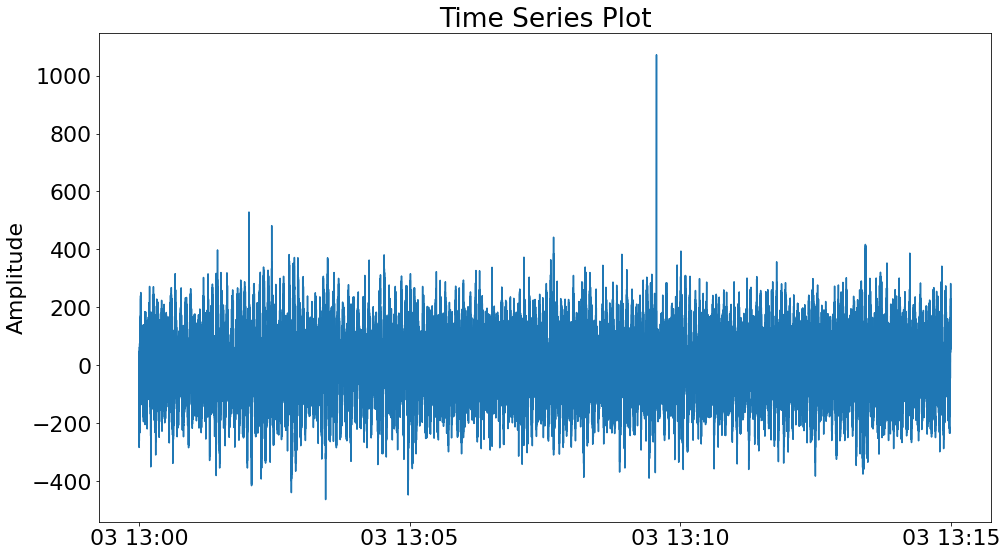

In [5]:
ooipy.plot(data_trace)

## **Filter Data**

You can bandpass filter data between fmin (in Hz) and fmax (in Hz).

In [6]:
data_trace_filter = ooipy.get_acoustic_data_LF(starttime, endtime, node, fmin = 15, fmax = 35, verbose=True, zero_mean=True)

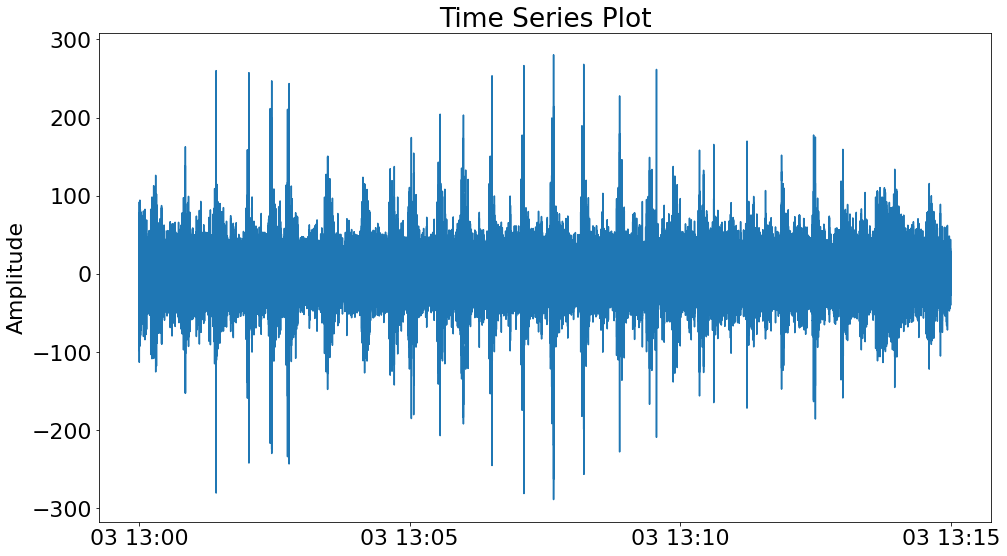

In [7]:
ooipy.plot(data_trace_filter)

**Computing and Plotting Spectrograms**

More info about the parameteres can be found <a href="https://ooipy.readthedocs.io/en/latest/hydrophone.html?highlight=compute_spectrogram#ooipy.hydrophone.basic.HydrophoneData.compute_spectrogram">here</a>   

/opt/anaconda3/lib/python3.7/site-packages/ooipy/tools/ooiplotlib.py:226: UserWarning: The following kwargs were not used by contour: 'fmin', 'fmax', 'xlabel_rot', 'plot', 'save', 'filename', 'title', 'xlabel', 'xlabel_format', 'ylabel', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_time', 'res_reduction_freq', 'dpi', 'fontsize', 'extend_type', 'logy'
  **kwargs


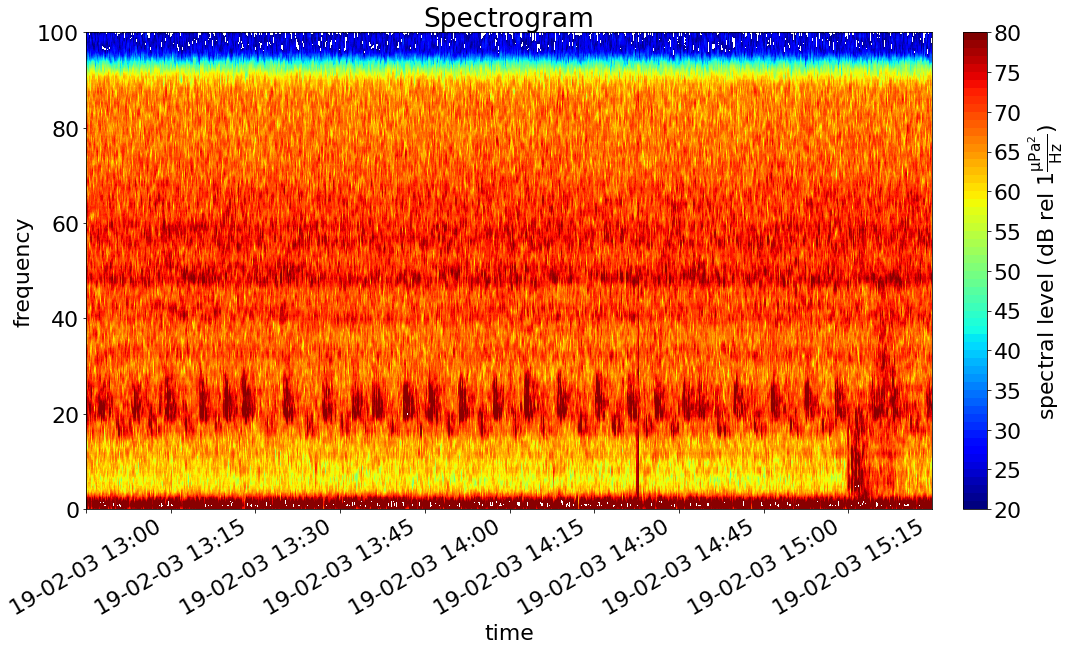

In [8]:
spec = data_trace.compute_spectrogram(L = 256,avg_time=None, overlap=0.9)
ooipy.plot(spec, fmin=0, fmax=100, xlabel_rot=30)

# Download OOI Broadband (Fs=64000 Hz) Data 

NOTE: processign broadband hydrophone data takes much longer than the low-frequency hydrophone data due to a higher sampling rate. If you are running this notebook on your local machine, make sure the time window you select for the broadband hydrophone data is not too long.

You need to choose a note from this list:

For broadband hydrophones (Fs = 64000 Hz):
- 'LJ01D' for Oregon Shelf Base Seafloor
- 'LJ01A' for Oregon Slope Base Seafloor
- 'PC01A' for Slope Base Shallow Profiler
- 'PC03A' for Axial Base Shallow Profiler
- 'LJ01C' for Offshore Base Seafloor
- 'LJ03A' for Axial Base Seafloor

You also need to have a starttime and endtime in this format (yy,m,d,hh,min,sec)

In [9]:
start_time = datetime.datetime(2019,1,12,3,0,0)
end_time = datetime.datetime(2019,1,12,3,1,0)
node = 'LJ01C'
hdata_broadband = ooipy.get_acoustic_data(start_time, end_time, node, verbose=True)

Fetching URLs...
Sorting valid URLs for Time Window...


In [10]:
print(hdata_broadband.stats)

         network: OO
         station: HYEA1
        location: LJ01C
         channel: YDH
       starttime: 2019-01-12T02:59:59.999999Z
         endtime: 2019-01-12T03:00:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 3840001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 8993, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 36835328})
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2019, 1, 12, 3, 1)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 1, 12, 3, 0))']


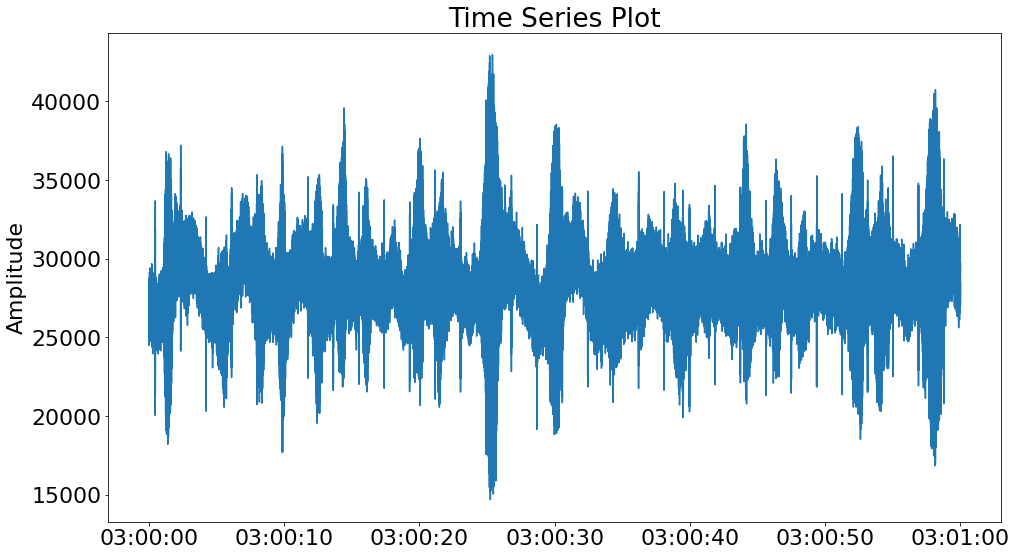

In [11]:
ooipy.plot(hdata_broadband)

/opt/anaconda3/lib/python3.7/site-packages/ooipy/tools/ooiplotlib.py:226: UserWarning: The following kwargs were not used by contour: 'fmin', 'fmax', 'xlabel_rot', 'plot', 'save', 'filename', 'title', 'xlabel', 'xlabel_format', 'ylabel', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_time', 'res_reduction_freq', 'dpi', 'fontsize', 'extend_type', 'logy'
  **kwargs


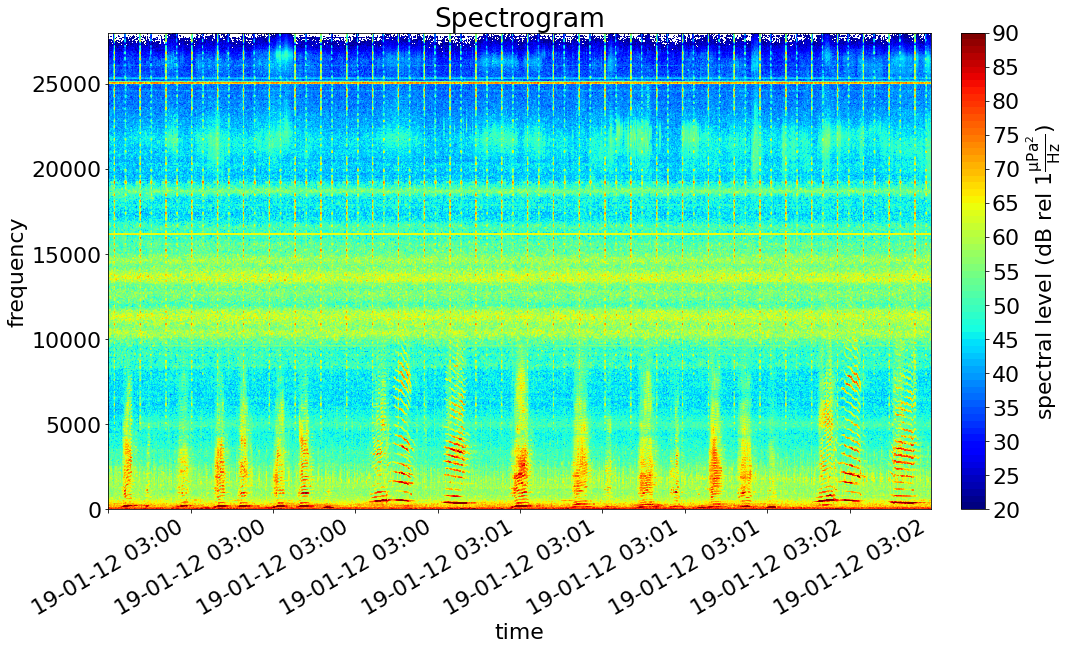

In [12]:
spec1 = hdata_broadband.compute_spectrogram(avg_time=None, overlap=0.6)
ooipy.plot(spec1, fmin=0, fmax=28000, xlabel_rot=30,vmax=90)

# Some Examples

## Airgun Pulses

Fetching URLs...
Sorting valid URLs for Time Window...


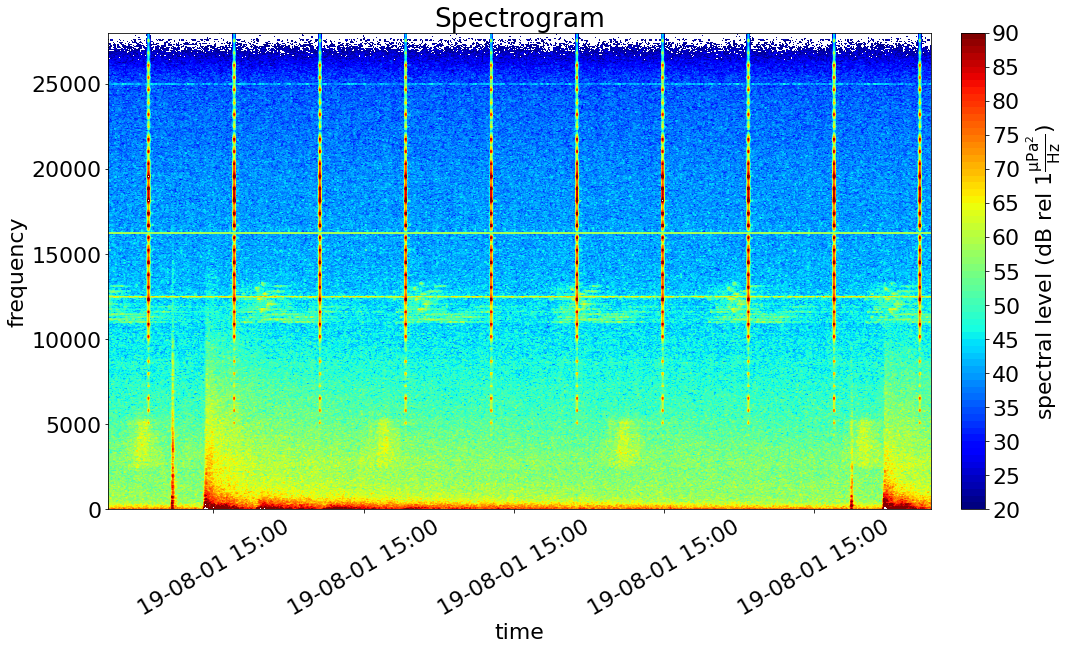

In [15]:
node = 'LJ03A'
start_time = datetime.datetime(2019,8,1,15,0,3)
end_time = datetime.datetime(2019,8,1,15,0,20)
hdata_broadband = ooipy.get_acoustic_data(start_time, end_time, node, verbose=True)
spec1 = hdata_broadband.compute_spectrogram(avg_time=None, overlap=0.6)
ooipy.plot(spec1, fmin=0, fmax=28000, xlabel_rot=30,vmax=90)

## More Whale Calls

Fetching URLs...
Sorting valid URLs for Time Window...


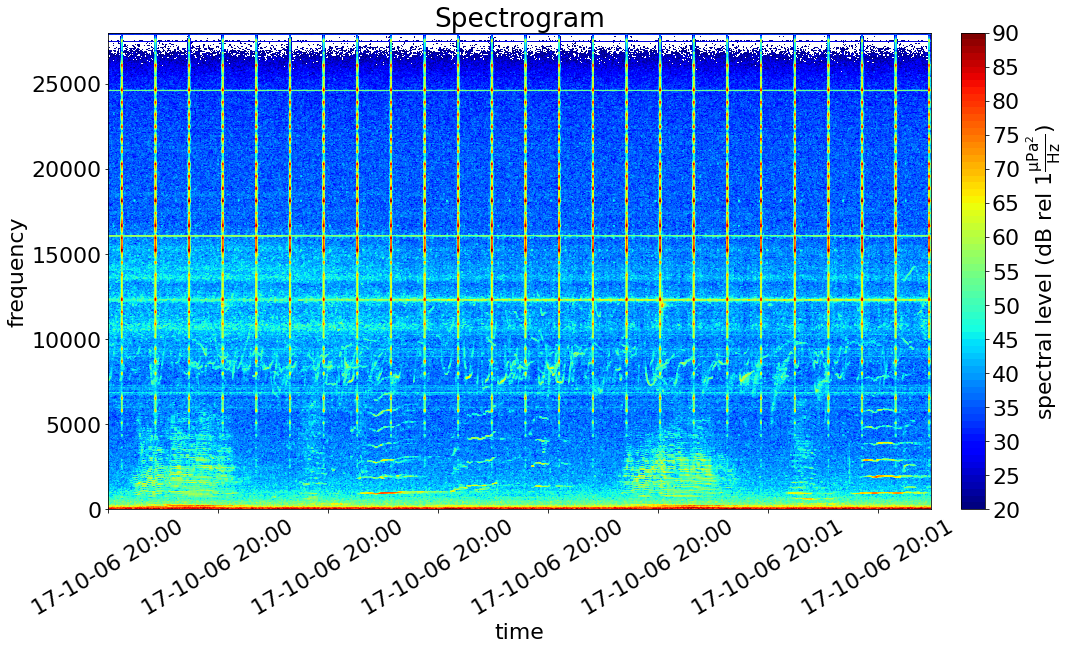

In [18]:
node = 'LJ01A'
start_time = datetime.datetime(2017,10,6,20,0,0)
end_time = datetime.datetime(2017,10,6,20,0,30)
hdata_broadband = ooipy.get_acoustic_data(start_time, end_time, node, verbose=True)
spec1 = hdata_broadband.compute_spectrogram(avg_time=None, overlap=0.6, average_type='median')
ooipy.plot(spec1, fmin=0, fmax=28000, xlabel_rot=30,vmax=90)

## Ship Noise

Name: Prime Express

Type: Tanker

CPA: ~10km

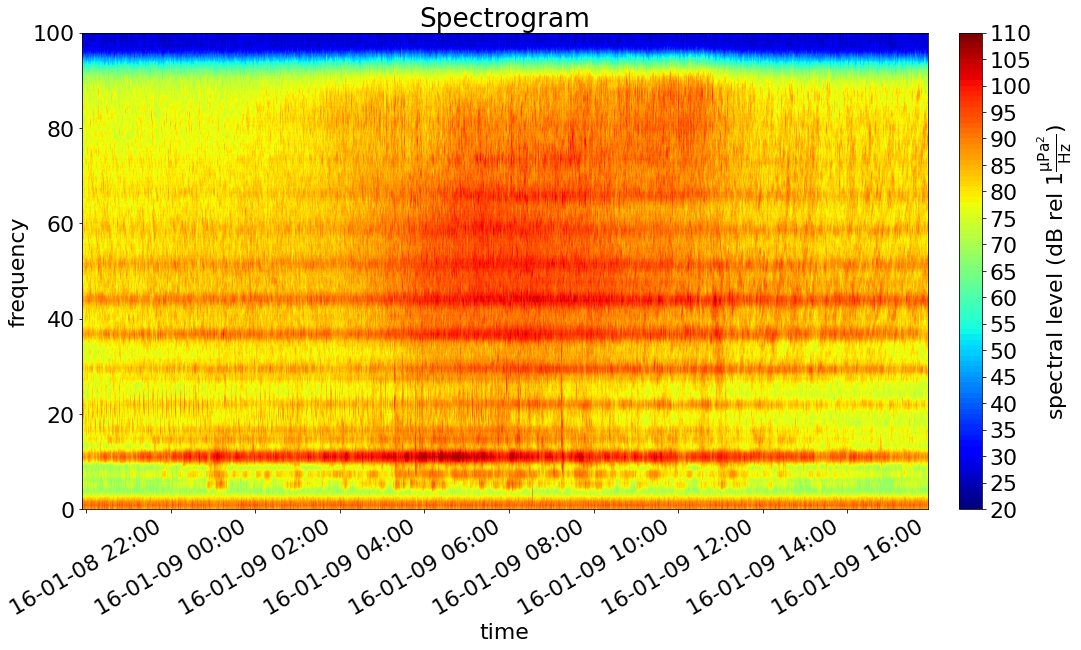

In [14]:
start_time = datetime.datetime(2016,1,8,21,54,0)
end_time = datetime.datetime(2016,1,8,23,54,0)
node = 'Axial_Base'
data_trace = ooipy.get_acoustic_data_LF(start_time, end_time, node, verbose=True, zero_mean=True)
spec = data_trace.compute_spectrogram(L = 256,avg_time=None, overlap=0.9)
ooipy.plot(spec, fmin=0, fmax=100, xlabel_rot=30,vmax=110)

Fetching URLs...
Sorting valid URLs for Time Window...


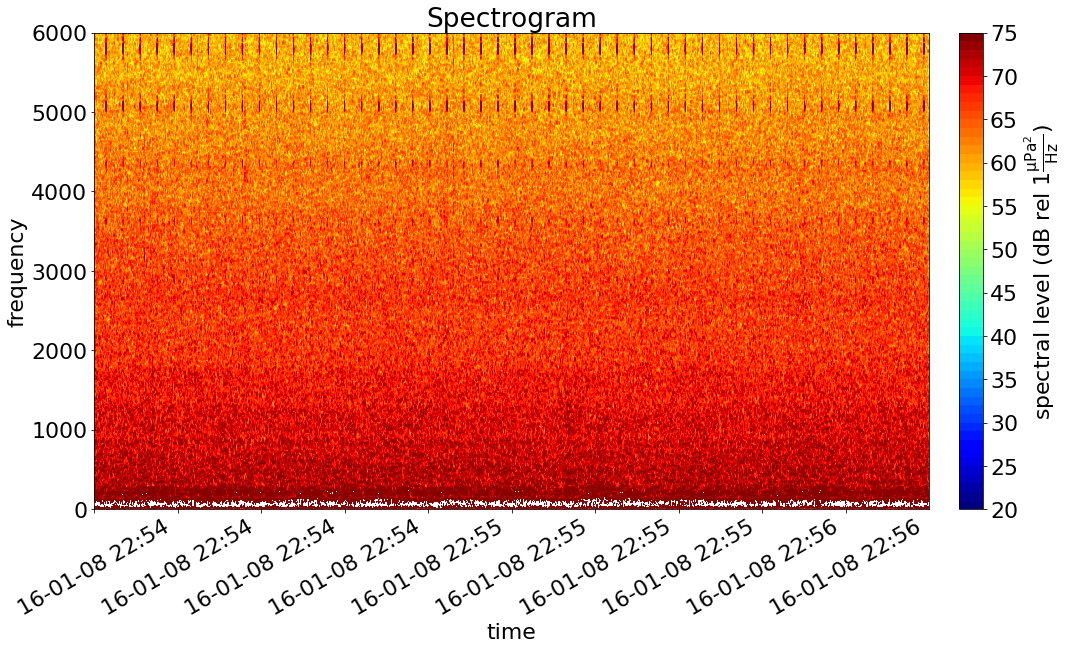

In [17]:
start_time = datetime.datetime(2016,1,8,22,54,0)
end_time = datetime.datetime(2016,1,8,22,55,0)
node = 'LJ03A'
hdata_broadband = ooipy.get_acoustic_data(start_time, end_time, node, verbose=True)
spec1 = hdata_broadband.compute_spectrogram(avg_time=None, overlap=0.6)
ooipy.plot(spec1, fmin=0, fmax=6000, xlabel_rot=30,vmax=75)

## Another Ship Noise


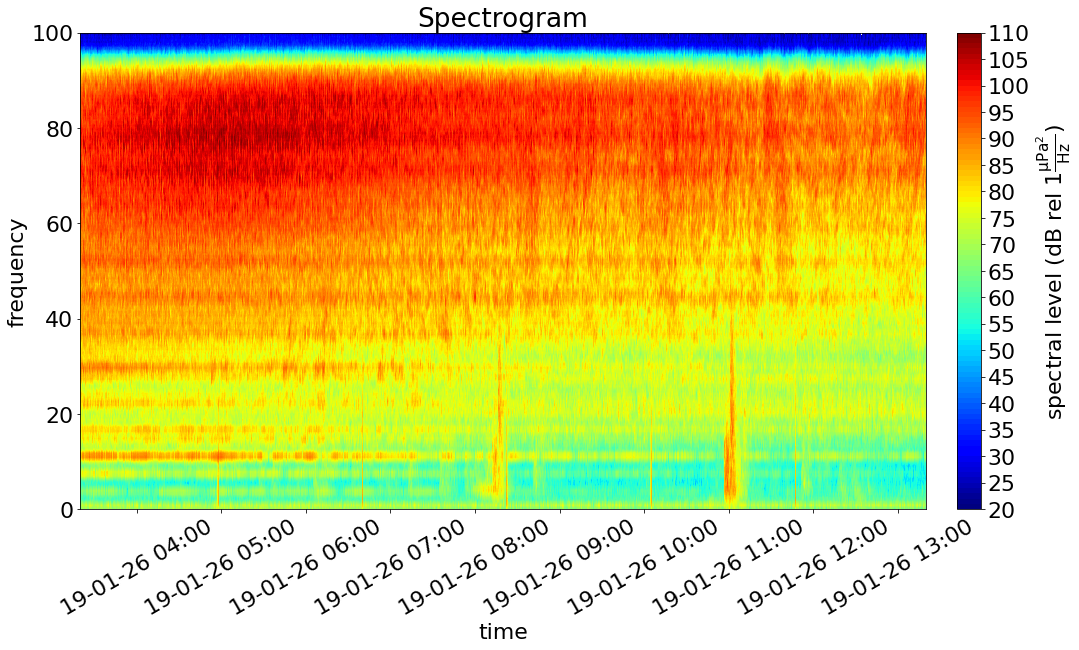

In [10]:
starttime = datetime.datetime(2019,1,26,3,20)
endtime = datetime.datetime(2019,1,26,4,20)
node = 'Axial_Base'
data_trace = ooipy.get_acoustic_data_LF(starttime, endtime, node, verbose=True, zero_mean=True)
spec = data_trace.compute_spectrogram(L = 256,avg_time=None, overlap=0.9)
ooipy.plot(spec, fmin=0, fmax=100, xlabel_rot=30,vmax=110)

Fetching URLs...
Sorting valid URLs for Time Window...


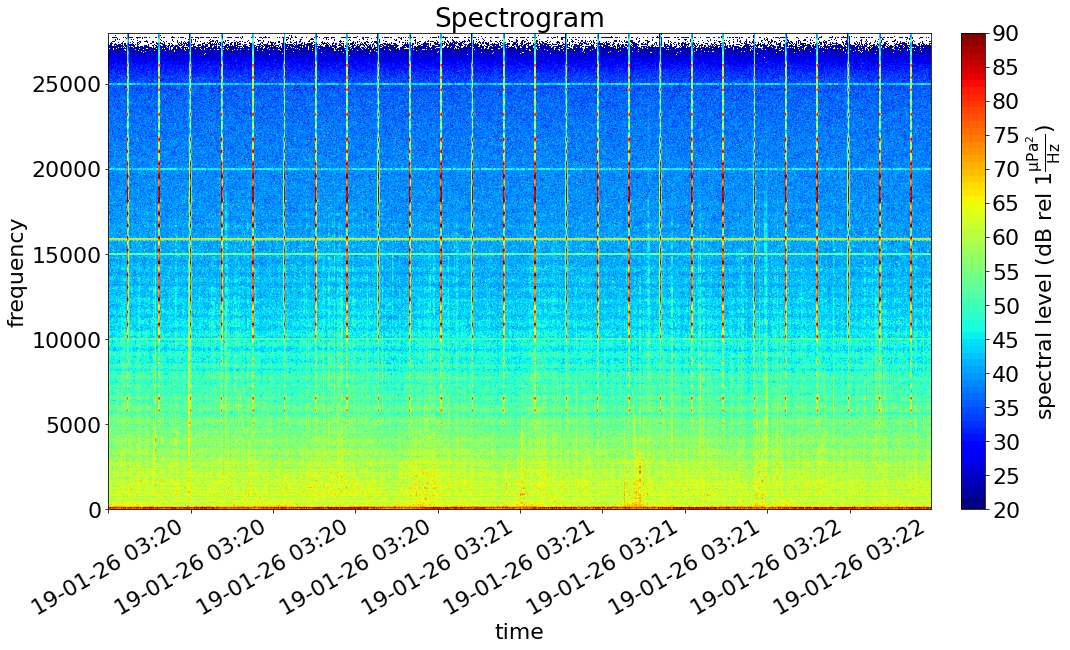

In [12]:
starttime = datetime.datetime(2019,1,26,3,20)
endtime = datetime.datetime(2019,1,26,3,21)
node = 'LJ03A'
hdata_broadband = ooipy.get_acoustic_data(starttime, endtime, node, verbose=True)
spec1 = hdata_broadband.compute_spectrogram(avg_time=15, overlap=0.6)
ooipy.plot(spec1, fmin=0, fmax=6000, xlabel_rot=30,vmax=65)

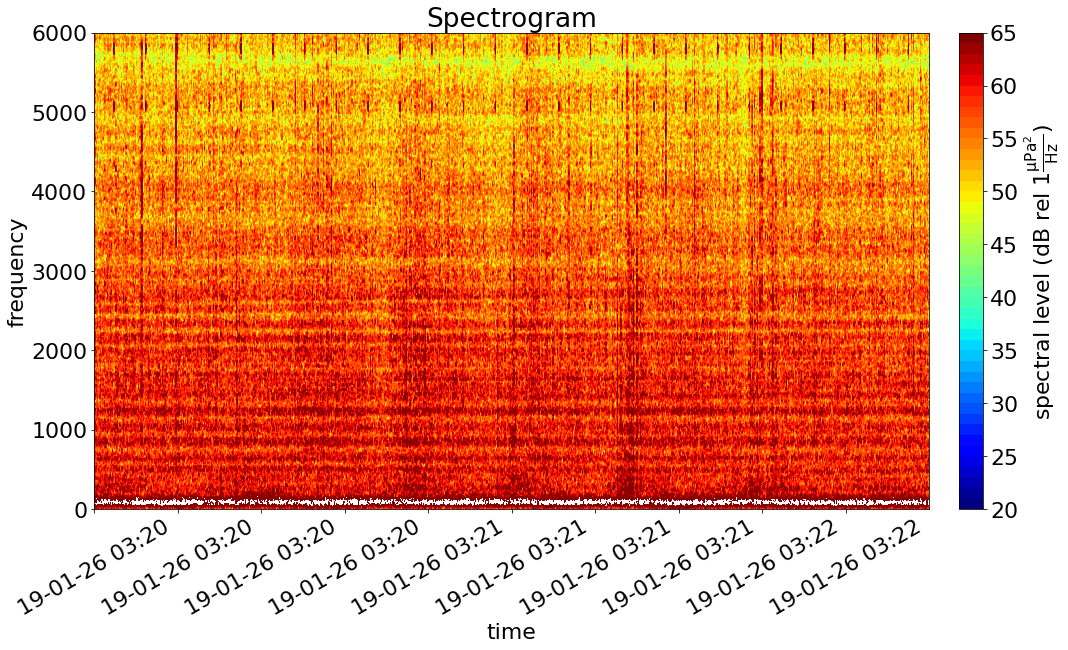

In [13]:
ooipy.plot(spec1, fmin=0, fmax=6000, xlabel_rot=30,vmax=65)

## Earthquake
a 5.9 magnitude earthquake about 300 km from the hydrophone at 2019-09-05 15:02:45 (UTC)

In [24]:
start_time = datetime.datetime(2021,12,20,20,2,45)
end_time = datetime.datetime(2021,12,20,5,20,2,55)
node = 'Axial_Base'
data_trace = ooipy.get_acoustic_data_LF(start_time, end_time, node, verbose=True, zero_mean=True)
spec = data_trace.compute_spectrogram(L = 256,avg_time=None, overlap=0.9)
ooipy.plot(spec, fmin=0, fmax=100, xlabel_rot=30,vmax=110)

   Specific Time window timed out.


AttributeError: 'NoneType' object has no attribute 'compute_spectrogram'

## Tonga Eruption

Jan. 15, 2022 at 4 UTC, it tooks ~10min, it was at 650 feet water depth

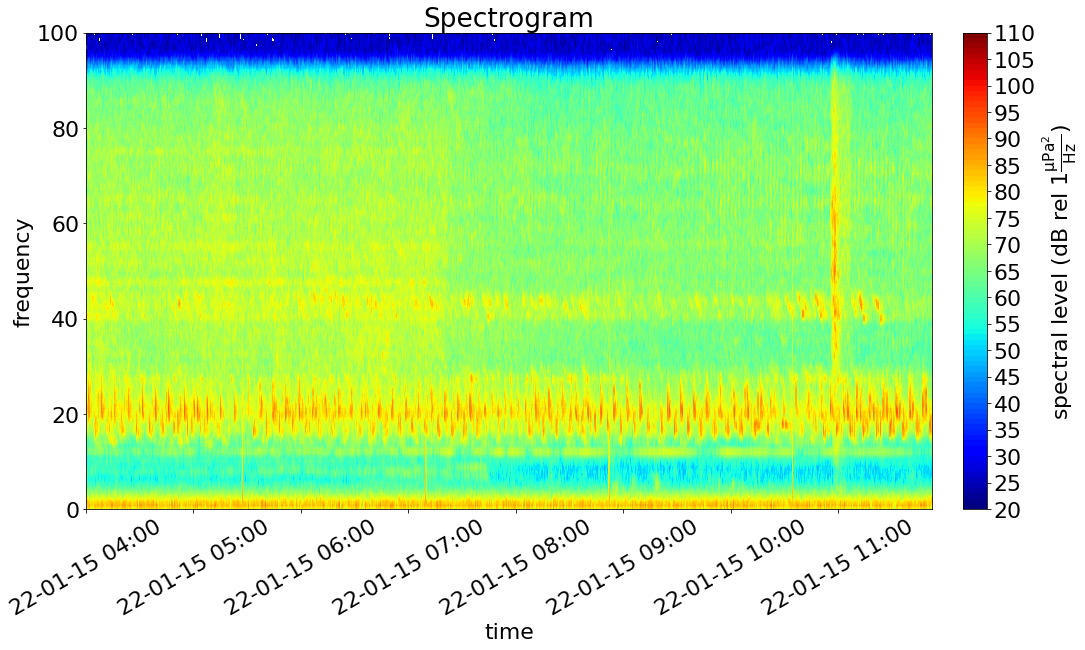

In [41]:
start_time = datetime.datetime(2022,1,15,4,0,0)
end_time = datetime.datetime(2022,1,15,5,8,0,0)
node = 'Axial_Base'
data_trace = ooipy.get_acoustic_data_LF(start_time, end_time, node, verbose=True, zero_mean=True)
spec = data_trace.compute_spectrogram(L = 256,avg_time=None, overlap=0.9)
ooipy.plot(spec, fmin=0, fmax=100, xlabel_rot=30,vmax=110)